In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
images_in_folder = 'yoga_pose_dataset/dt_set'
images_out_folder = 'yoga_pose_dataset/test_dataset'
csv_out_path = 'yoga_pose_dataset/test_dataset/yoga_points.csv'

In [7]:
import csv
import cv2
import numpy as np
import os
import sys
import tqdm

from mediapipe.python.solutions import drawing_utils as mp_drawing
from mediapipe.python.solutions import pose as mp_pose


with open(csv_out_path, 'w') as csv_out_file:
  csv_out_writer = csv.writer(csv_out_file, delimiter=',', quoting=csv.QUOTE_MINIMAL)

  # Folder names are used as pose class names.
  pose_class_names = sorted([n for n in os.listdir(images_in_folder) if not n.startswith('.')])

  for pose_class_name in pose_class_names:
    print('Bootstrapping ', pose_class_name, file=sys.stderr)

    if not os.path.exists(os.path.join(images_out_folder, pose_class_name)):
      os.makedirs(os.path.join(images_out_folder, pose_class_name))

    image_names = sorted([
        n for n in os.listdir(os.path.join(images_in_folder, pose_class_name))
        if not n.startswith('.')])
    for image_name in tqdm.tqdm(image_names, position=0):
      # Load image.
      input_frame = cv2.imread(os.path.join(images_in_folder, pose_class_name, image_name))
      input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)

      # Initialize fresh pose tracker and run it.
      with mp_pose.Pose() as pose_tracker:
        result = pose_tracker.process(image=input_frame)
        pose_landmarks = result.pose_landmarks
      
      # Save image with pose prediction (if pose was detected).
      output_frame = input_frame.copy()
      if pose_landmarks is not None:
        mp_drawing.draw_landmarks(
            image=output_frame,
            landmark_list=pose_landmarks,
            connections=mp_pose.POSE_CONNECTIONS)
      output_frame = cv2.cvtColor(output_frame, cv2.COLOR_RGB2BGR)
      cv2.imwrite(os.path.join(images_out_folder, image_name), output_frame)
      
      # Save landmarks.
      if pose_landmarks is not None:
        # Check the number of landmarks and take pose landmarks.
        assert len(pose_landmarks.landmark) == 33, 'Unexpected number of predicted pose landmarks: {}'.format(len(pose_landmarks.landmark))
        pose_landmarks = [[lmk.x, lmk.y, lmk.z] for lmk in pose_landmarks.landmark]

        # Map pose landmarks from [0, 1] range to absolute coordinates to get
        # correct aspect ratio.
        frame_height, frame_width = output_frame.shape[:2]
        pose_landmarks *= np.array([frame_width, frame_height, frame_width])

        # Write pose sample to CSV.
        pose_landmarks = np.around(pose_landmarks, 5).flatten().astype(np.str).tolist()
        csv_out_writer.writerow([image_name, pose_class_name] + pose_landmarks)


Bootstrapping  adho mukha savanasana
  0%|          | 0/64 [00:00<?, ?it/s]C:\Users\athar\AppData\Local\Temp\ipykernel_20684\1709034791.py:59: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pose_landmarks = np.around(pose_landmarks, 5).flatten().astype(np.str).tolist()
100%|██████████| 64/64 [00:22<00:00,  2.90it/s]
Bootstrapping  ashtanga namaskar
100%|██████████| 54/54 [00:19<00:00,  2.80it/s]
Bootstrapping  aswa sanchalnasan
100%|██████████| 47/47 [00:14<00:00,  3.30it/s]
Bootstrapping  bhujangasana
100%|██████████| 73/73 [00:24<00:00,  2.97it/s]
Bootstrapping  pranamasan
100%|██████████| 40/40 [00:12<00:00,  3.24it/s]
Bootstrapping  urdhva hastasana
100%|██████████| 4

In [2]:
df = pd.read_csv("yoga_pose_dataset/yoga_points.csv")
df.head()

,1. 1.png,adho mukha savanasana,325.12937,248.66275,-14.02381,313.01145,253.43553,-36.89016,311.54327,252.4995,...,37.05289,614.99004,303.46111,291.18134,559.8689,327.44781,-29.15857,552.4408,313.22474,254.85702
0,1. 5-benefits-of-downward-facing-dog-pose.png,adho mukha savanasana,253.73501,227.64684,-98.02761,243.56613,225.38113,-128.86104,244.06715,223.75009,...,138.42383,507.98756,257.08868,400.26583,480.75299,276.63886,64.59103,462.38303,271.64450,363.63319
1,11. yoga_anatomy_using_muscle_awareness_to_low...,adho mukha savanasana,177.05481,192.24767,-0.83140,184.75130,198.64390,-1.04240,186.41680,198.90003,...,215.03437,41.54295,173.74730,-27.19253,78.49761,220.57695,199.83397,61.82344,202.70990,-49.05836
2,12. 66a62b8c606fd88e0401b5af0a7cbca7.png,adho mukha savanasana,547.73491,312.87449,-75.48733,560.10480,314.79114,-54.73631,561.20962,314.16895,...,189.16889,231.48762,347.63055,-120.35459,292.55954,381.64534,106.04493,288.78837,390.62911,-237.85689
3,12. downward-facing-dog-pose.png,adho mukha savanasana,430.27752,295.73377,-3.10299,444.10327,301.30794,8.65380,445.47091,300.54885,...,293.61035,20.88070,360.56400,-86.35221,150.72562,358.70828,242.47431,106.90675,380.71123,-174.65320
4,13. downward-facing-dog-800x490.png,adho mukha savanasana,330.79181,355.85972,0.90438,316.89103,356.08660,-31.69939,316.21904,354.83216,...,-82.26506,758.16603,418.70322,211.12370,710.31938,499.31780,-190.15815,671.06085,450.71476,142.72138


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/yoga_pose_dataset/yoga_test.csv")
df_test.head()

In [3]:
# to calculate angle in three points
def cal_ang(item, pt1, pt2, pt3):
  # print(item)
  a = np.array([item[(pt1*3)+2], item[(pt1*3)+1+2], item[(pt1*3)+2+2]])
  b = np.array([item[(pt2*3)+2], item[(pt2*3)+1+2], item[(pt2*3)+2+2]])
  c = np.array([item[(pt3*3)+2], item[(pt3*3)+1+2], item[(pt3*3)+2+2]])

  ba = a - b
  bc = c - b

  cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
  angle = (np.arccos(cosine_angle))*(180/np.pi)

  return angle

In [4]:
df_angle = pd.DataFrame(columns=['left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_leg_waist', 'right_leg_waist', 'left_knee', 'right_knee', 'target'])
df_angle_test = pd.DataFrame(columns=['left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_leg_waist', 'right_leg_waist', 'left_knee', 'right_knee', 'target'])

In [7]:
# filling the dataframes
for index, item in df.iterrows():
    dict = {
        'left_shoulder': cal_ang(item, 13, 11, 12),
        'right_shoulder': cal_ang(item, 24, 12, 14),
        'left_elbow': cal_ang(item, 15, 13, 11),
        'right_elbow': cal_ang(item, 12, 14, 16),
        'left_leg_waist': cal_ang(item, 11, 23, 25),
        'right_leg_waist': cal_ang(item, 12, 24, 26),
        'left_knee': cal_ang(item, 23, 25, 27),
        'right_knee': cal_ang(item, 24, 26, 28),
        'target': item[1]
    }
    df_angle = df_angle.append(dict, ignore_index=True)

C:\Users\athar\AppData\Local\Temp\ipykernel_22340\384237746.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_angle = df_angle.append(dict, ignore_index=True)
C:\Users\athar\AppData\Local\Temp\ipykernel_22340\384237746.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_angle = df_angle.append(dict, ignore_index=True)
C:\Users\athar\AppData\Local\Temp\ipykernel_22340\384237746.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_angle = df_angle.append(dict, ignore_index=True)
C:\Users\athar\AppData\Local\Temp\ipykernel_22340\384237746.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_angle = df_angle.append(dict, ign

In [8]:
df_angle["target"].unique()

array(['adho mukha savanasana', 'ashtanga namaskar', 'aswa sanchalnasan',
       'bhujangasana', 'pranamasan', 'urdhva hastasana', 'uttanasana'],
      dtype=object)

In [9]:
df_angle[df_angle["target"]=="uttanasana"].describe()

,left_shoulder,right_shoulder,left_elbow,right_elbow,left_leg_waist,right_leg_waist,left_knee,right_knee
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,111.624105,105.229619,112.789440,109.032333,44.216564,41.091522,151.834320,151.469078
std,21.003212,25.566349,24.185559,25.291837,24.211303,25.155201,20.996822,21.094988
min,24.840289,45.963186,68.228535,63.884009,10.621470,12.099258,63.977127,37.479661
25%,101.265751,92.430123,94.358456,86.869456,26.285924,22.030324,143.763730,145.407379
50%,111.876890,109.525208,111.444065,110.365250,39.844951,33.506331,157.944941,152.265990
75%,124.840399,121.193419,131.802407,127.841772,57.050572,56.515201,166.166014,164.925609
max,163.233875,160.760450,159.825117,161.636450,147.246546,144.073899,175.419840,178.299478


In [12]:
df_angle.head()

,left_shoulder,right_shoulder,left_elbow,right_elbow,left_leg_waist,right_leg_waist,left_knee,right_knee,target
0,145.648687,113.665711,162.476840,89.743541,106.392132,106.151594,178.791470,167.096341,adho mukha savanasana
1,104.432232,89.362087,125.554282,51.907182,94.484499,54.094555,177.768606,99.907599,adho mukha savanasana
2,164.621283,119.829763,166.969804,154.518682,71.551695,75.013284,166.782541,174.112128,adho mukha savanasana
3,134.418235,129.433059,73.790960,103.939240,88.420583,90.850729,173.436870,174.266035,adho mukha savanasana
4,141.373801,164.251392,113.186353,107.857030,81.383702,80.532091,172.484590,162.419356,adho mukha savanasana


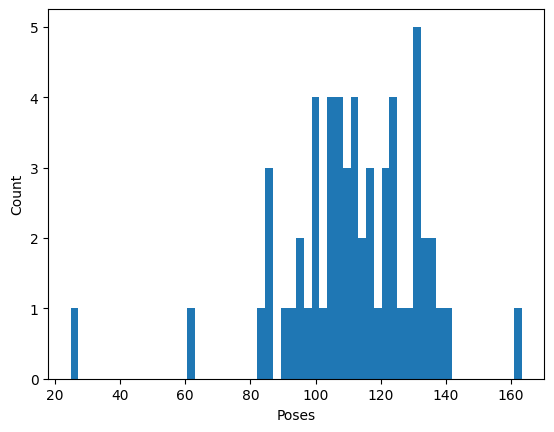

In [10]:
plt.hist(df_angle[df_angle["target"]=="uttanasana"].left_shoulder, bins=58)
plt.xlabel("Poses")
plt.ylabel("Count")
plt.show()

In [11]:
df_angle.to_csv("yoga_pose_dataset/sn_salut_angle.csv", index=False)

dataset ready
take new dataset from csv file, 
remove outlier
analyse dataset once again
create train and test dataset
train model
test model
model works good then implement joint based angle correction feature